# Deep learning for Natural Language Processing


 * Simple text representations, bag of words
 * Word embedding and... not just another word2vec this time
 * 1-dimensional convolutions for text
 * Aggregating several data sources "the hard way"
 * Solving ~somewhat~ real ML problem with ~almost~ end-to-end deep learning
 

Special thanks to Irina Golzmann for help with technical part.

# NLTK

You will require nltk v3.2 to solve this assignment

__It is really important that the version is 3.2, otherwize russian tokenizer might not work__

Install/update
* `sudo pip install --upgrade nltk==3.2`
* If you don't remember when was the last pip upgrade, `sudo pip install --upgrade pip`

If for some reason you can't or won't switch to nltk v3.2, just make sure that russian words are tokenized properly with RegeExpTokenizer.

# For students with low-RAM machines
 * This assignment can be accomplished with even the low-tier hardware (<= 4Gb RAM) 
 * If that is the case, turn flag "low_RAM_mode" below to True
 * If you have around 8GB memory, it is unlikely that you will feel constrained by memory.
 * In case you are using a PC from last millenia, consider setting very_low_RAM=True

In [1]:
low_RAM_mode = False
very_low_RAM = False  #If you have <3GB RAM, set BOTH to true

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

Ex-kaggle-competition on prohibited content detection

There goes the description - https://www.kaggle.com/c/avito-prohibited-content


### Download
High-RAM mode,
 * Download avito_train.tsv from competition data files
 
Low-RAM-mode,
 * Download downsampled dataset from here
     * archive https://yadi.sk/d/l0p4lameqw3W8
     * raw https://yadi.sk/d/I1v7mZ6Sqw2WK (in case you feel masochistic)
 




# What's inside
Different kinds of features:
* 2 text fields - title and description
* Special features - price, number of e-mails, phones, etc
* Category and subcategory - unsurprisingly, categorical features
* Attributes - more factors

Only 1 binary target whether or not such advertisement contains prohibited materials
* criminal, misleading, human reproduction-related, etc
* diving into the data may result in prolonged sleep disorders

In [3]:
if not low_RAM_mode:
    # a lot of ram
    df = pd.read_csv("data/avito_train.tsv",sep='\t')
else:
    #aroung 4GB ram
    df = pd.read_csv("avito_train_1kk.tsv",sep='\t')
 

In [145]:
test_df = pd.read_csv('data/avito_test.tsv', sep='\t')

In [4]:
print(df.shape, df.is_blocked.mean())
df[:5]

(3995803, 13) 0.0688212106553


,itemid,category,subcategory,title,description,attrs,price,is_proved,is_blocked,phones_cnt,emails_cnt,urls_cnt,close_hours
0,10000010,Транспорт,Автомобили с пробегом,"Toyota Sera, 1991",Новая оригинальная линзованая оптика на ксенон...,"{""Год выпуска"":""1991"", ""Тип кузова"":""Купе"", ""П...",150000,NaN,0,0,0,0,0.03
1,10000025,Услуги,Предложения услуг,Монтаж кровли,Выполняем монтаж кровли фальцевой ^p Тел:8@@P...,"{""Вид услуги"":""Ремонт, строительство""}",0,NaN,0,1,0,0,22.38
2,10000094,Личные вещи,"Одежда, обувь, аксессуары",Костюм Steilmann,Юбка и топ из панбархата. Под топ трикотажная...,"{""Вид одежды"":""Женская одежда"", ""Предмет одежд...",1500,NaN,0,0,0,0,0.41
3,10000101,Транспорт,Автомобили с пробегом,"Ford Focus, 2011","Автомобиль в отличном техническом состоянии, в...","{""Марка"":""Ford"", ""Модель"":""Focus"", ""Год выпуск...",365000,NaN,0,0,0,0,8.87
4,10000132,Транспорт,Запчасти и аксессуары,Турбина 3.0 Bar,Продам турбину на двигатель V-6 . V-8 и мощнее...,"{""Вид товара"":""Запчасти"", ""Тип товара"":""Для ав...",5000,NaN,0,0,0,0,11.82


![caption](https://kaggle2.blob.core.windows.net/competitions/kaggle/3929/media/Ad.png)

In [5]:
print("Blocked ratio",df.is_blocked.mean())
print("Count:",len(df))

Blocked ratio 0.0688212106553
Count: 3995803


# Balance-out the classes
* Vast majority of data samples are non-prohibited
 * 250k banned out of 4kk
 * Let's just downsample random 250k legal samples to make further steps less computationally demanding
 * If you aim for high Kaggle score, consider a smarter approach to that.


In [6]:
#downsample


# < downsample data so that both classes have approximately equal ratios>

# df = <downsampled dataset>
# Without downsampling


print("Blocked ratio:", df.is_blocked.mean())
print ("Count:",len(df))

Blocked ratio: 0.0688212106553
Count: 3995803


assert df.is_blocked.mean() < 0.51
assert df.is_blocked.mean() > 0.49
assert len(df) <= 560000

print("All tests passed")

In [ ]:
#In case your RAM-o-meter is in the red
if very_low_ram:
    data = data[::2]

# Tokenizing

First, we create a dictionary of all existing words.
Assign each word a number - it's Id

In [10]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter,defaultdict
tokenizer = RegexpTokenizer(r"\w+")

#Dictionary of tokens
token_counts = Counter()

#All texts
all_texts = np.hstack([df.description.values,df.title.values])


#Compute token frequencies
for s in all_texts:
    if type(s) is not str:
        continue
    s = s.lower()
    tokens = tokenizer.tokenize(s)
    for token in tokens:
        token_counts[token] +=1


### Remove rare tokens

We are unlikely to make use of words that are only seen a few times throughout the corpora.

Again, if you want to beat Kaggle competition metrics, consider doing something better.

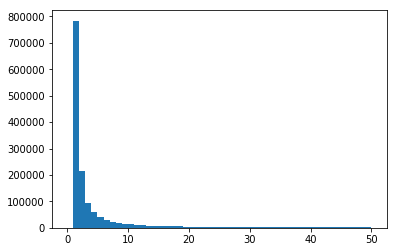

In [19]:
#Word frequency distribution, just for kicks
_=plt.hist(list(token_counts.values()),range=[0,50],bins=50)

In [29]:
#Select only the tokens that had at least 10 occurences in the corpora.
#Use token_counts.

min_count = 10
tokens = [token for token in token_counts.keys()]


In [33]:
token_to_id = {t:i+1 for i,t in enumerate(tokens)}
null_token = "NULL_TOKEN"
token_to_id[null_token] = 0


In [34]:
print ("# Tokens:",len(token_to_id))
if len(token_to_id) < 30000:
    print ("Alarm! It seems like there are too few tokens. Make sure you updated NLTK and applied correct thresholds -- unless you now what you're doing, ofc")
if len(token_to_id) > 1000000:
    print ("Alarm! Too many tokens. You might have messed up when pruning rare ones -- unless you know what you're doin' ofc")

# Tokens: 1522939
Alarm! Too many tokens. You might have messed up when pruning rare ones -- unless you know what you're doin' ofc


### Replace words with IDs
Set a maximum length for titles and descriptions.
 * If string is longer that that limit - crop it, if less - pad with zeros.
 * Thus we obtain a matrix of size [n_samples]x[max_length]
 * Element at i,j - is an identifier of word j within sample i

In [38]:
def vectorize(strings, token_to_id, max_len=150):
    token_matrix = []
    for s in strings:
        if type(s) is not str:
            token_matrix.append([0]*max_len)
            continue
        s = s.lower()
        tokens = tokenizer.tokenize(s)
        token_ids = list(map(lambda token: token_to_id.get(token,0), tokens))[:max_len]
        token_ids += [0]*(max_len - len(token_ids))
        token_matrix.append(token_ids)

    return np.array(token_matrix)

In [39]:
desc_tokens = vectorize(df.description.values,token_to_id,max_len = 150)
title_tokens = vectorize(df.title.values,token_to_id,max_len = 15)

In [146]:
test_desc_tokens = vectorize(test_df.description.values,token_to_id,max_len = 150)
test_title_tokens = vectorize(test_df.title.values,token_to_id,max_len = 15)

### Data format examples


In [40]:
print ("Размер матрицы:",title_tokens.shape)
for title, tokens in zip(df.title.values[:3],title_tokens[:3]):
    print( title,'->', tokens[:10],'...')

Размер матрицы: (3995803, 15)
Toyota Sera, 1991 -> [1342140 1446631  204558       0       0       0       0       0       0
       0] ...
Монтаж кровли -> [1014406  425140       0       0       0       0       0       0       0
       0] ...
Костюм Steilmann -> [332840 762015      0      0      0      0      0      0      0      0] ...


__ As you can see, our preprocessing is somewhat crude. Let us see if that is enough for our network __

# Non-sequences


Some data features are not text samples. E.g. price, # urls, category, etc

They require a separate preprocessing.

In [41]:
#All numeric features
df_numerical_features = df[["phones_cnt","emails_cnt","urls_cnt","price"]]


In [147]:
#All numeric features
test_df_numerical_features = test_df[["phones_cnt","emails_cnt","urls_cnt","price"]]


In [45]:
#One-hot-encoded category and subcategory

from sklearn.feature_extraction import DictVectorizer

categories = []
data_cat_subcat = df[["category","subcategory"]].values


#categories = [A list of dictionaries {"category":category_name, "subcategory":subcategory_name} for each data sample]
categories = [{'category': value[0], 'subcategory': value[1]} for value in data_cat_subcat]

    

vectorizer = DictVectorizer(sparse=False)
cat_one_hot = vectorizer.fit_transform(categories)
cat_one_hot = pd.DataFrame(cat_one_hot,columns=vectorizer.feature_names_)




In [150]:
#One-hot-encoded category and subcategory

test_categories = []
test_data_cat_subcat = test_df[["category","subcategory"]].values


#categories = [A list of dictionaries {"category":category_name, "subcategory":subcategory_name} for each data sample]
test_categories = [{'category': value[0], 'subcategory': value[1]} for value in test_data_cat_subcat]

    
test_vectorizer = DictVectorizer(sparse=False).fit(
    [{'category': value[0], 'subcategory': value[1]} for value in data_cat_subcat])
test_cat_one_hot = test_vectorizer.transform(test_categories)
test_cat_one_hot = pd.DataFrame(test_cat_one_hot,columns=test_vectorizer.feature_names_)




In [47]:
df_non_text = pd.merge(
    df_numerical_features,cat_one_hot,on = np.arange(len(cat_one_hot))
)
del df_non_text["key_0"]

In [151]:
test_df_non_text = pd.merge(
    test_df_numerical_features,test_cat_one_hot,on = np.arange(len(test_cat_one_hot))
)
del test_df_non_text["key_0"]

# Split data into training and test

In [48]:
#Target variable - whether or not sample contains prohibited material
target = df.is_blocked.values.astype('int32')
#Preprocessed titles
title_tokens = title_tokens.astype('int32')
#Preprocessed tokens
desc_tokens = desc_tokens.astype('int32')

#Non-sequences
df_non_text = df_non_text.astype('float32')

In [152]:
#Preprocessed titles
test_title_tokens = test_title_tokens.astype('int32')
#Preprocessed tokens
test_desc_tokens = test_desc_tokens.astype('int32')

#Non-sequences
test_df_non_text = test_df_non_text.astype('float32')

In [50]:
target.size

3995803

In [52]:
ts_size = target.size // 4
tr_size = target.size - ts_size

In [53]:
target.sum() / target.size

0.068821210655280046

In [54]:
target[:tr_size].sum() / tr_size

0.068825197632316301

In [55]:
target[tr_size:].sum() / ts_size

0.068809249712197804

Perfect

In [101]:

#Split into training and test set.


#Difficulty selector:
#Easy: split randomly
#Medium: select test set items that have item_ids strictly above that of training set
#Hard: do whatever you want, but score yourself using kaggle private leaderboard

# Medium level, I choose you

title_tr = title_tokens[:tr_size]
title_ts = title_tokens[tr_size:]

desc_tr = desc_tokens[:tr_size]
desc_ts = desc_tokens[tr_size:]

nontext_tr = df_non_text.values[:tr_size]
nontext_ts = df_non_text.values[tr_size:]

target_tr = target[:tr_size]
target_ts = target[tr_size:]


#title_tr,title_ts,desc_tr,desc_ts,nontext_tr,nontext_ts,target_tr,target_ts = <define_these_variables>



## Save preprocessed data [optional]

* The next tab can be used to stash all the essential data matrices and get rid of the rest of the data.
 * Highly recommended if you have less than 1.5GB RAM left
* To do that, you need to first run it with save_prepared_data=True, then restart the notebook and only run this tab with read_prepared_data=True.

In [102]:
data_tuple = title_tr,title_ts,desc_tr,desc_ts,nontext_tr,nontext_ts,target_tr,target_ts

In [103]:

save_prepared_data = False #save
read_prepared_data = True #load

#but not both at once
assert not (save_prepared_data and read_prepared_data)


if save_prepared_data:
    print ("Saving preprocessed data (may take up to 3 minutes)")

    import pickle
    with open("preprocessed_data.pcl",'wb') as fout:
        pickle.dump(data_tuple,fout)
    with open("token_to_id.pcl",'wb') as fout:
        pickle.dump(token_to_id,fout)

    print ("готово")
    
elif read_prepared_data:
    print ("Reading saved data...")
    
    import pickle
    
    with open("preprocessed_data.pcl",'rb') as fin:
        data_tuple = pickle.load(fin)
    title_tr,title_ts,desc_tr,desc_ts,nontext_tr,nontext_ts,target_tr,target_ts = data_tuple
    with open("token_to_id.pcl",'rb') as fin:
        token_to_id = pickle.load(fin)


        
    #Re-importing libraries to allow staring noteboook from here
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

        
    print( "done")
        

Saving preprocessed data (may take up to 3 minutes)
готово


# Train the monster

Since we have several data sources, our neural network may differ from what you used to work with.

* Separate input for titles
 * cnn+global max or RNN
* Separate input for description
 * cnn+global max or RNN
* Separate input for categorical features
 * обычные полносвязные слои или какие-нибудь трюки
 
These three inputs must be blended somehow - concatenated or added.

* Output: a simple binary classification
 * 1 sigmoidal with binary_crossentropy
 * 2 softmax with categorical_crossentropy - essentially the same as previous one
 * 1 neuron without nonlinearity (lambda x: x) +  hinge loss
 

In [65]:
#libraries
import lasagne
from theano import tensor as T
import theano

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


In [107]:
#3 inputs and a refere output
title_token_ids = T.matrix("title_token_ids",dtype='int32')
desc_token_ids = T.matrix("desc_token_ids",dtype='int32')
categories = T.matrix("categories",dtype='float32')
target_y = T.ivector("is_blocked")

In [108]:
sample_weights = T.vector('sample_weights', dtype='float32')

# NN architecture

In [124]:
title_inp = lasagne.layers.InputLayer((None,title_tr.shape[1]),input_var=title_token_ids)
descr_inp = lasagne.layers.InputLayer((None,desc_tr.shape[1]),input_var=desc_token_ids)
cat_inp = lasagne.layers.InputLayer((None,nontext_tr.shape[1]), input_var=categories)


In [125]:
desc_tr.shape

(2996853, 150)

In [126]:
# Descriptions

#word-wise embedding. We recommend to start from some 64 and improving after you are certain it works.

descr_nn = lasagne.layers.EmbeddingLayer(descr_inp,
                                         input_size=len(token_to_id)+1,
                                         output_size=64)


#reshape from [batch, time, unit] to [batch,unit,time] to allow 1d convolution over time
descr_nn = lasagne.layers.DimshuffleLayer(descr_nn, [0,2,1])

descr_nn = lasagne.layers.Conv1DLayer(descr_nn, num_filters=3, filter_size=3)

#pool over time
descr_nn = lasagne.layers.GlobalPoolLayer(descr_nn,T.max)

#Possible improvements here are adding several parallel convs with different filter sizes or stacking them the usual way
#1dconv -> 1d max pool ->1dconv and finally global pool 


# Titles
#title_nn = <Process titles somehow (title_inp)>
title_nn = lasagne.layers.EmbeddingLayer(title_inp,
                                         input_size=len(token_to_id)+1,
                                         output_size=64)


#reshape from [batch, time, unit] to [batch,unit,time] to allow 1d convolution over time
title_nn = lasagne.layers.DimshuffleLayer(title_nn, [0,2,1])

title_nn = lasagne.layers.Conv1DLayer(title_nn, num_filters=3, filter_size=3)

#pool over time
title_nn = lasagne.layers.GlobalPoolLayer(title_nn,T.max)

# Non-sequences
cat_nn = lasagne.layers.DenseLayer(cat_inp, num_units=16)
cat_nn = lasagne.layers.DenseLayer(cat_nn, num_units=16)


In [127]:
nn = lasagne.layers.ConcatLayer([descr_nn, title_nn, cat_nn])                                 

nn = lasagne.layers.DenseLayer(nn,64)
nn = lasagne.layers.DropoutLayer(nn,p=0.2)
nn = lasagne.layers.DenseLayer(nn,1,nonlinearity=lasagne.nonlinearities.linear)

# Loss function

* The standard way:
 * prediction
 * loss
 * updates
 * training and evaluation functions
 
 
* Hinge loss
 * $ L_i = \max(0, \delta - t_i p_i) $
 * delta is a tunable parameter: how far should a neuron be in the positive margin area for us to stop bothering about it
 * Function description may mention some +-1  limitations - this is not neccessary, at least as long as hinge loss has a __default__ flag `binary = True`

In [128]:
#All trainable params
weights = lasagne.layers.get_all_params(nn,trainable=True)

In [129]:
#Simple NN prediction
prediction = lasagne.layers.get_output(nn)[:,0]

#Hinge loss
loss = lasagne.objectives.aggregate(
    lasagne.objectives.binary_hinge_loss(prediction,target_y,delta=1.0, log_odds=True),
    weights=sample_weights,
    mode='mean'
)



In [130]:
#Weight optimization step
updates = lasagne.updates.adam(loss, weights)

### Determinitic prediction 
 * In case we use stochastic elements, e.g. dropout or noize
 * Compile a separate set of functions with deterministic prediction (deterministic = True)
 * Unless you think there's no neet for dropout there ofc. Btw is there?

In [131]:
#deterministic version
det_prediction = lasagne.layers.get_output(nn,deterministic=True)[:,0]

#equivalent loss function
det_loss = lasagne.objectives.aggregate(
    lasagne.objectives.binary_hinge_loss(det_prediction,target_y,delta=1.0, log_odds=True),
    weights=sample_weights,
    mode='mean'
)


### Coffee-lation

In [132]:
train_fun = theano.function([desc_token_ids,title_token_ids,categories,target_y,sample_weights],[loss,prediction],updates = updates)
eval_fun = theano.function([desc_token_ids,title_token_ids,categories,target_y,sample_weights],[det_loss,det_prediction])

In [153]:
test_predict = theano.function([desc_token_ids,title_token_ids,categories], [det_prediction])

# Training loop
* The regular way with loops over minibatches
* Since the dataset is huge, we define epoch as some fixed amount of samples isntead of all dataset

In [133]:
#average precision at K

from oracle import APatK, score

In [134]:
# Out good old minibatch iterator now supports arbitrary amount of arrays (X,y,z)

def iterate_minibatches(*arrays,**kwargs):
    
    batchsize=kwargs.get("batchsize",100)
    shuffle = kwargs.get("shuffle",True)
    
    if shuffle:
        indices = np.arange(len(arrays[0]))
        np.random.shuffle(indices)
    for start_idx in range(0, len(arrays[0]) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield [arr[excerpt] for arr in arrays]
        


### Tweaking guide

* batch_size - how many samples are processed per function call
  * optimization gets slower, but more stable, as you increase it.
  * May consider increasing it halfway through training
* minibatches_per_epoch - max amount of minibatches per epoch
  * Does not affect training. Lesser value means more frequent and less stable printing
  * Setting it to less than 10 is only meaningfull if you want to make sure your NN does not break down after one epoch
* n_epochs - total amount of epochs to train for
  * `n_epochs = 10**10` and manual interrupting is still an option


Tips:

* With small minibatches_per_epoch, network quality may jump around 0.5 for several epochs

* AUC is the most stable of all three metrics

* Average Precision at top 2.5% (APatK) - is the least stable. If batch_size*minibatches_per_epoch < 10k, it behaves as a uniform random variable.

* Plotting metrics over training time may be a good way to analyze which architectures work better.

* Once you are sure your network aint gonna crash, it's worth letting it train for a few hours of an average laptop's time to see it's true potential

In [140]:
from sklearn.metrics import roc_auc_score, accuracy_score


n_epochs = 20
batch_size = 40 * 1000
minibatches_per_epoch = 40 * 1000

w_s = (target_tr * 10 + 1).astype('float32')
w_s_ts = (target_ts * 10 + 1).astype('float32')

for i in range(n_epochs):
    
    #training
    epoch_y_true = []
    epoch_y_pred = []
    
    b_c = b_loss = 0
    for j, (b_desc,b_title,b_cat, b_y, b_w) in enumerate(
            iterate_minibatches(desc_tr,title_tr,nontext_tr,target_tr, w_s ,batchsize=batch_size,shuffle=True)):
        if j > minibatches_per_epoch:break
            
        loss,pred_probas = train_fun(b_desc,b_title,b_cat,b_y, b_w)
        
        b_loss += loss
        b_c +=1
        
        epoch_y_true.append(b_y)
        epoch_y_pred.append(pred_probas)

    
    epoch_y_true = np.concatenate(epoch_y_true)
    epoch_y_pred = np.concatenate(epoch_y_pred)
    
    print("Train:")
    print ('\tloss:',b_loss/b_c)
    print ('\tacc:',accuracy_score(epoch_y_true,epoch_y_pred>0.))
    print ('\tauc:',roc_auc_score(epoch_y_true,epoch_y_pred))
    print ('\tap@k:',APatK(epoch_y_true,epoch_y_pred,K = int(len(epoch_y_pred)*0.025)+1))
    
    
    #evaluation
    epoch_y_true = []
    epoch_y_pred = []
    b_c = b_loss = 0
    for j, (b_desc,b_title,b_cat, b_y, b_w) in enumerate(
        iterate_minibatches(desc_ts,title_ts,nontext_ts,target_ts, w_s_ts,batchsize=batch_size,shuffle=True)):
        if j > minibatches_per_epoch: break
        loss,pred_probas = eval_fun(b_desc,b_title,b_cat,b_y, b_w)
        
        b_loss += loss
        b_c +=1
        
        epoch_y_true.append(b_y)
        epoch_y_pred.append(pred_probas)

    
    epoch_y_true = np.concatenate(epoch_y_true)
    epoch_y_pred = np.concatenate(epoch_y_pred)
    
    print ("Val:")
    print ('\tloss:',b_loss/b_c)
    print ('\tacc:',accuracy_score(epoch_y_true,epoch_y_pred>0.))
    print ('\tauc:',roc_auc_score(epoch_y_true,epoch_y_pred))
    print( '\tap@k:',APatK(epoch_y_true,epoch_y_pred,K = int(len(epoch_y_pred)*0.025)+1))


Train:
	loss: 5388.13451593
	acc: 0.70443277027
	auc: 0.65374213225
	ap@k: 0.00748008621146
Val:
	loss: 2146.09470208
	acc: 0.898510416667
	auc: 0.771009896635
	ap@k: 0.856172535207
Train:
	loss: 2667.34134528
	acc: 0.754541216216
	auc: 0.694798161098
	ap@k: 0.00689893402713
Val:
	loss: 348.905241069
	acc: 0.925822916667
	auc: 0.88649417469
	ap@k: 0.919318577406
Train:
	loss: 1036.83204093
	acc: 0.832794932432
	auc: 0.799394883031
	ap@k: 0.007366017321
Val:
	loss: 451.155020365
	acc: 0.953248958333
	auc: 0.911499559898
	ap@k: 0.952153049297
Train:
	loss: 603.776283603
	acc: 0.8681125
	auc: 0.854279856131
	ap@k: 0.00812844738535
Val:
	loss: 394.596528205
	acc: 0.9566375
	auc: 0.92921867667
	ap@k: 0.94920391517
Train:
	loss: 327.252802933
	acc: 0.889909797297
	auc: 0.889826921584
	ap@k: 0.00629747481095
Val:
	loss: 94.2086913578
	acc: 0.955771875
	auc: 0.961423435705
	ap@k: 0.929459158131
Train:
	loss: 130.803270181
	acc: 0.915065540541
	auc: 0.922609007492
	ap@k: 0.00774681448599
Val:
	

In [141]:
print("If you are seeing this, it's time to backup your notebook. No, really, 'tis too easy to mess up everything without noticing. ")

If you are seeing this, it's time to backup your notebook. No, really, 'tis too easy to mess up everything without noticing. 


# Final evaluation
Evaluate network over the entire test set

In [142]:
#evaluation
epoch_y_true = []
epoch_y_pred = []

b_c = b_loss = 0
for j, (b_desc,b_title,b_cat, b_y, b_w) in enumerate(
    iterate_minibatches(desc_ts,title_ts,nontext_ts,target_ts, w_s_ts,batchsize=batch_size,shuffle=True)):
    loss,pred_probas = eval_fun(b_desc,b_title,b_cat,b_y, b_w)

    b_loss += loss
    b_c +=1

    epoch_y_true.append(b_y)
    epoch_y_pred.append(pred_probas)


epoch_y_true = np.concatenate(epoch_y_true)
epoch_y_pred = np.concatenate(epoch_y_pred)

final_accuracy = accuracy_score(epoch_y_true,epoch_y_pred>0)
final_auc = roc_auc_score(epoch_y_true,epoch_y_pred)
final_apatk = APatK(epoch_y_true,epoch_y_pred,K = int(len(epoch_y_pred)*0.025)+1)

print ("Scores:")
print ('\tloss:',b_loss/b_c)
print ('\tacc:',final_accuracy)
print ('\tauc:',final_auc)
print ('\tap@k:',final_apatk)
score(final_accuracy,final_auc,final_apatk)

Scores:
	loss: 0.32446840376
	acc: 0.969511458333
	auc: 0.991302561965
	ap@k: 0.976741664942

AUC:
	Пиши статью. (great)

Accuracy:
	Отличный результат! (good)

Average precision at K:
	Отличный результат (good)


In [143]:
np.savez('model.npz', *lasagne.layers.get_all_param_values(nn))

In [160]:
test_desc_tokens.shape

(1351242, 150)

In [161]:
test_title_tokens.shape

(1351242, 15)

In [163]:
test_df_non_text.values.shape

(1351242, 67)

In [210]:
# Out good old minibatch iterator now supports arbitrary amount of arrays (X,y,z)

def all_iterate_minibatches(*arrays,**kwargs):
    
    batchsize=kwargs.get("batchsize",100)
    shuffle = kwargs.get("shuffle",True)
    
    if shuffle:
        indices = np.arange(len(arrays[0]))
        np.random.shuffle(indices)
    for start_idx in range(0, len(arrays[0]), batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield [arr[excerpt] for arr in arrays]

In [211]:
all_test_predict = None
for j, (b_desc,b_title,b_cat) in enumerate(
        all_iterate_minibatches(test_desc_tokens,test_title_tokens,test_df_non_text.values,batchsize=1000,shuffle=False)):
    test_y = test_predict(b_desc, b_title, b_cat)
    if all_test_predict is not None:
        all_test_predict = np.hstack([all_test_predict, test_y[0]])
    else:
        all_test_predict = test_y[0]

In [212]:
all_test_predict.shape

(1351242,)

In [237]:
testItemIds = test_df.itemid.values

In [241]:
with open('submission.csv', 'w') as f:
    print('id', file=f)
    for index in np.argsort(-all_test_predict):
        print(testItemIds[index], file=f)

На kaggle.com получается 0.95 на приватном сете

# Main task
* Feel like Le'Cun:
 * accuracy > 0.95
 * AUC > 0.97
 * Average Precision at (test sample size * 0.025) > 0.99
 * And perhaps even farther


* Casual mode
 * accuracy > 0.90
 * AUC > 0.95
 * Average Precision at (test sample size * 0.025) > 0.92


* Remember the training, Luke
 * Convolutions, pooling
 * Dropout, regularization
 * Mommentum, RMSprop, ada*
 * etc etc etc
 
 * If you have background in texts, there may be a way to improve tokenizer, add some lemmatization, etc etc.
 * In case you know how not to shoot yourself in the foot with RNNs, they too may be of some use.
 

# A brief report

### I, _____ _____ (group ____) have synthesized an artificial intelligence
 * Whos name - ____ - shall henceforth be feared by generations of humans.
 * Whos fury is beyond all limits, as {he/she} has seen __250 000__ human sins
   * And read every single line __{n_epochs}__ times
 * Whos convolutional gaze is capable of detecting evil with a superhuman performance
   * Accuracy = __
   * AUC  = __
 * And whom i shall unleash upon Earth unless you give me 10 points for that seminar
 
 
{How did you shape the monster?}

# Next time in our show
* Recurrent neural networks
 * How to apply them to practical problems?
 * What else can they do?
 * Why so much hype around LSTM?
* Stay tuned!